In [ ]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from woe_transformer import WoETransformer

## Preprocesamiento y Análisis Exploratorio (EDA)

Vamos a empezar por realizar un analisis exploratorio del dataset

In [ ]:
#Lectura del archivo
df=pd.read_csv('data/fraud_train.csv')

In [ ]:
df.head()

,ID,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,CL00007646,Aug,4,Friday,Honda,Urban,Monday,Aug,5,Male,...,7 years,36 to 40,No,No,External,1 to 2,4 to 8 years,2 vehicles,1994,All Perils
1,CL00009711,Dec,2,Tuesday,Chevrolet,Urban,Wednesday,Dec,3,Female,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
2,CL00010809,Feb,2,Sunday,Chevrolet,Urban,Monday,Feb,3,Male,...,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,Liability
3,CL00012496,Jun,3,Tuesday,Pontiac,Urban,Thursday,Jul,4,Male,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
4,CL00015396,Jan,2,Sunday,Toyota,Rural,Thursday,Jan,3,Male,...,6 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,All Perils


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    5000 non-null   object
 1   Month                 5000 non-null   object
 2   WeekOfMonth           5000 non-null   int64 
 3   DayOfWeek             5000 non-null   object
 4   Make                  5000 non-null   object
 5   AccidentArea          5000 non-null   object
 6   DayOfWeekClaimed      5000 non-null   object
 7   MonthClaimed          5000 non-null   object
 8   WeekOfMonthClaimed    5000 non-null   int64 
 9   Sex                   5000 non-null   object
 10  MaritalStatus         5000 non-null   object
 11  Fault                 5000 non-null   object
 12  PolicyType            5000 non-null   object
 13  VehicleCategory       5000 non-null   object
 14  VehiclePrice          5000 non-null   object
 15  FraudFound_P          5000 non-null   

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,FraudFound_P,Deductible,Year
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.769200,2.678400,0.058400,408.060000,1994.867000
std,1.294244,1.257971,0.234522,45.138054,0.800649
min,1.000000,1.000000,0.000000,300.000000,1994.000000
25%,2.000000,2.000000,0.000000,400.000000,1994.000000
50%,3.000000,3.000000,0.000000,400.000000,1995.000000
75%,4.000000,4.000000,0.000000,400.000000,1996.000000
max,5.000000,5.000000,1.000000,700.000000,1996.000000


In [ ]:
df['FraudFound_P'].value_counts(normalize=True)

,proportion
FraudFound_P,
0,0.9416
1,0.0584


Existe un desbalance de las etiquetas de salida por lo cual WOE nos ayudara a poder mejorar este desbalance??

No se detectan duplicados en los registros, ni en los id de clientes

In [ ]:
print(df.duplicated(subset=['ID']).sum())
print(df.duplicated().sum())


0
0


se observa algunos valores mal etiquetados

In [ ]:
df.DayOfWeekClaimed.unique()

array(['Monday', 'Wednesday', 'Thursday', 'Tuesday', 'Friday', 'Saturday',
       'Sunday', '0'], dtype=object)

con esto se observa que hay algunos valores que tienen 0 en los campos DayOfWeekClaimed, MonthClaimed. Al ser este solamente un registro. Se opta por eliminarlo


In [ ]:
(df == '0').sum()

,0
ID,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,1
MonthClaimed,1
WeekOfMonthClaimed,0
Sex,0


In [ ]:
df.drop(df[df.DayOfWeekClaimed=='0'].index,inplace=True)


En una tabla de frecuencias podemos notar otro error, ya que al parecer un vehiculos sport tienen asignados una poliza para vehiculos tipo sedan. Siendo este otro tiepo de vehiculo

In [ ]:
pd.crosstab(df['VehicleCategory'], df['PolicyType'])

PolicyType,Sedan - All Perils,Sedan - Collision,Sedan - Liability,Sport - All Perils,Sport - Collision,Sport - Liability,Utility - All Perils,Utility - Collision,Utility - Liability
VehicleCategory,,,,,,,,,
Sedan,1332,1781,0,0,0,0,0,0,0
Sport,0,0,1633,8,110,1,0,0,0
Utility,0,0,0,0,0,0,112,12,10


Este parece ser un error el cual deberia consultarse con el propietario de los datos, para saber si el escenario en el cual a un vehiculo sport se le puede otorgar una poliza para un auto tipo sedan. Para este caso consideraremos que fue un error de captura y cambiaremos los 1633 Sedan - Liability a Sport - Liability

In [ ]:
df.loc[(df['VehicleCategory'] == 'Sport') & (df['PolicyType'] == 'Sedan - Liability'),'PolicyType']='Sport - Liability'


Analizando valores faltantes

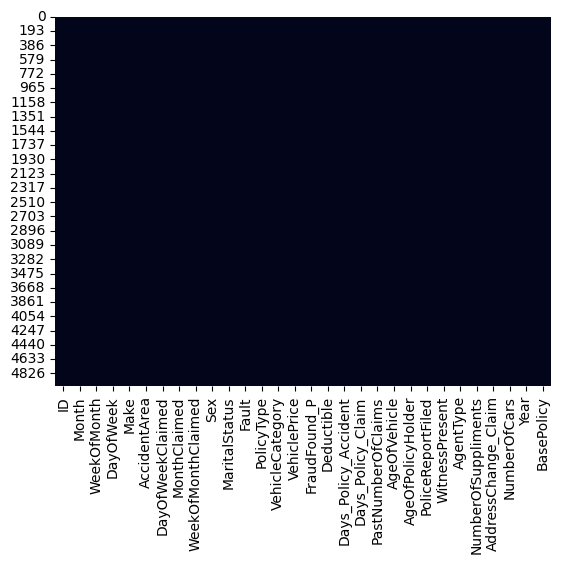

In [ ]:
#Graficamente detectando valores null
sns.heatmap(df.isnull(), cbar=False);

En el data set se detecto que los valores nuelos estan enmascarados como none, por lo cual modificando lo anterior podemos sacar la proporcion de valores nulos

In [ ]:
((df == 'none').sum()*100/df.shape[0]).sort_values(ascending=False)

,0
NumberOfSuppliments,46.109222
PastNumberOfClaims,28.865773
Days_Policy_Accident,0.460092
WeekOfMonth,0.000000
ID,0.000000
Month,0.000000
DayOfWeekClaimed,0.000000
MonthClaimed,0.000000
WeekOfMonthClaimed,0.000000
Sex,0.000000


Para el numero de accesorios la proporcion de valores faltantes es mayor a 40% por lo cual no es una caracteristica que pueda rellenarse facilemnte sin generar ruido por lo cual es mejor eliminar esta columna

In [ ]:
df.NumberOfSuppliments.value_counts()

,count
NumberOfSuppliments,
none,2305
more than 5,1238
1 to 2,802
3 to 5,654


In [ ]:
df.drop(columns=['NumberOfSuppliments'], inplace=True)

In [ ]:
df.PastNumberOfClaims.value_counts(normalize=True)

,proportion
PastNumberOfClaims,
2 to 4,0.344469
none,0.288658
1,0.233447
more than 4,0.133427


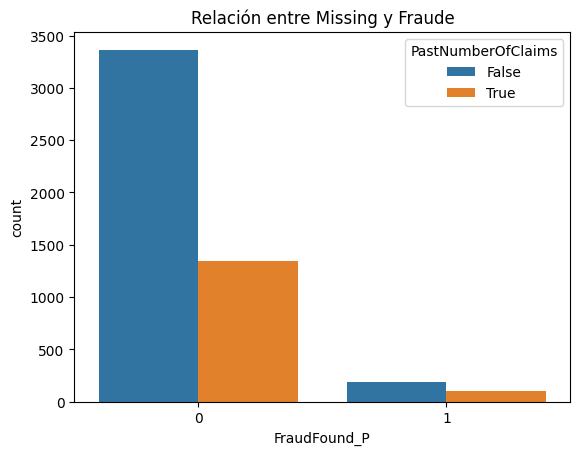

In [ ]:
# Comparar distribución para detectar si la falta de este valor es aleatorio
sns.countplot(x='FraudFound_P', hue=df['PastNumberOfClaims']=='none', data=df)
plt.title('Relación entre Missing y Fraude')
plt.show()

Partiendo de lo anterior parace no haber aleatoriedad en elos valores faltantes por lo cual se mantiene la distribucion de mas valores que no son fraude y los que son. Por lo cual se opta por rellenar estos valores faltantes con 0 quejas.

In [ ]:
df.loc[df['PastNumberOfClaims']=='none','PastNumberOfClaims']='0'

Para la variable Days_Policy_Accident checamos la distribucion de los valores notando que la mayoria de valores se centran en la categoria more than 30 por lo cual, rellenar con este por ser el valor mas frecuente una cantidad minima de valores faltantes no deberia causar ruido.

In [ ]:
df.Days_Policy_Accident.value_counts(normalize=True)

,proportion
Days_Policy_Accident,
more than 30,0.988598
none,0.004601
8 to 15,0.003001
15 to 30,0.003001
1 to 7,0.000800


In [ ]:
df.loc[df['Days_Policy_Accident']=='none','Days_Policy_Accident']='more than 30'

In [ ]:
df.Days_Policy_Accident.unique()

array(['more than 30', '1 to 7', '8 to 15', '15 to 30'], dtype=object)

Para la variable Days_Policy_Claim checamos la distribucion de los valores notando que la mayoria de valores se centran en la categoria more than 30 por lo cual, rellenar con este por ser el valor mas frecuente una cantidad minima de valores faltantes no deberia causar ruid

In [ ]:
df.Days_Policy_Claim.value_counts(normalize=True)

,proportion
Days_Policy_Claim,
more than 30,0.994999
15 to 30,0.003401
8 to 15,0.001600


In [ ]:
df.loc[df['Days_Policy_Claim']=='none','Days_Policy_Claim']='more than 30'

In [ ]:
df.Days_Policy_Claim.unique()

array(['more than 30', '15 to 30', '8 to 15'], dtype=object)

checando nuevamente los valores faltantes

In [ ]:
((df == 'none').sum()*100/df.shape[0]).sort_values(ascending=False)

,0
ID,0.0
Month,0.0
WeekOfMonth,0.0
DayOfWeek,0.0
Make,0.0
AccidentArea,0.0
DayOfWeekClaimed,0.0
MonthClaimed,0.0
WeekOfMonthClaimed,0.0
Sex,0.0


Analisis bivariado con la variable de fraude

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    4999 non-null   object
 1   Month                 4999 non-null   object
 2   WeekOfMonth           4999 non-null   int64 
 3   DayOfWeek             4999 non-null   object
 4   Make                  4999 non-null   object
 5   AccidentArea          4999 non-null   object
 6   DayOfWeekClaimed      4999 non-null   object
 7   MonthClaimed          4999 non-null   object
 8   WeekOfMonthClaimed    4999 non-null   int64 
 9   Sex                   4999 non-null   object
 10  MaritalStatus         4999 non-null   object
 11  Fault                 4999 non-null   object
 12  PolicyType            4999 non-null   object
 13  VehicleCategory       4999 non-null   object
 14  VehiclePrice          4999 non-null   object
 15  FraudFound_P          4999 non-null   int64

In [ ]:
# Cambiando las variables que faltan a categoricas
numerical_cols=df.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('FraudFound_P')
df[numerical_cols]=df[numerical_cols].astype('object')

las variables de fecha 'Month', 'WeekOfMonth', 'DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed' y Year no parecen tener mucha importancia en la prediccion de fraude. Las analizaremos para saber su distribucion

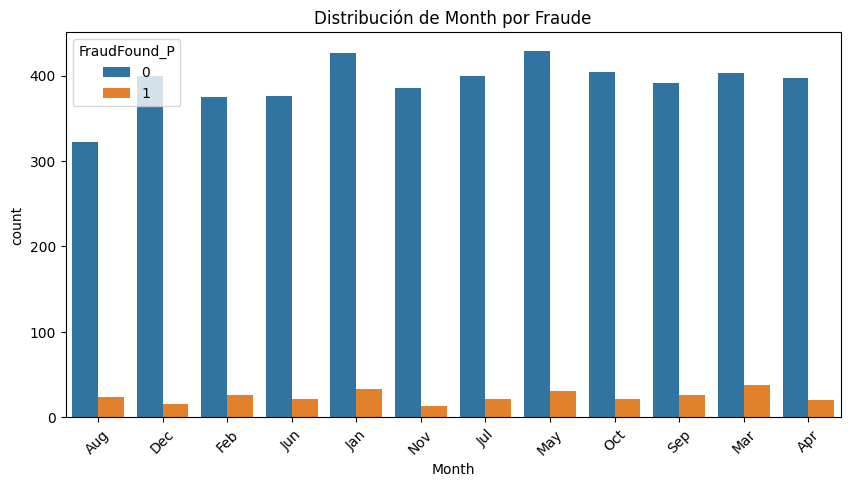

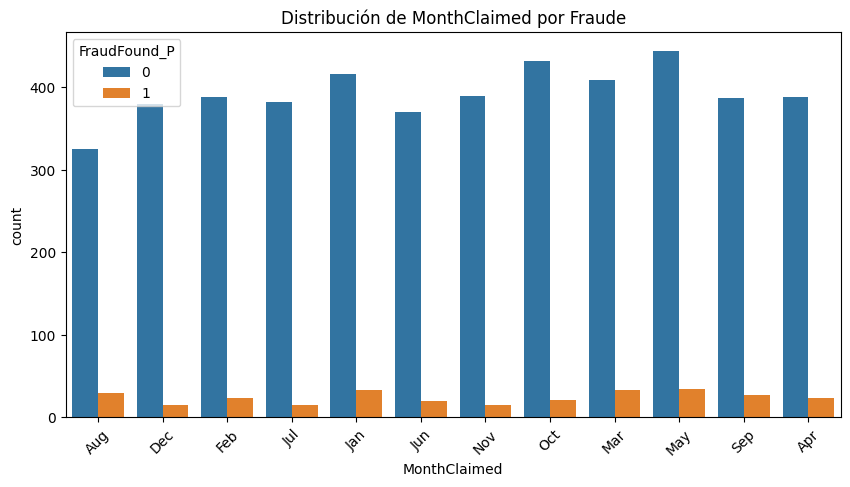

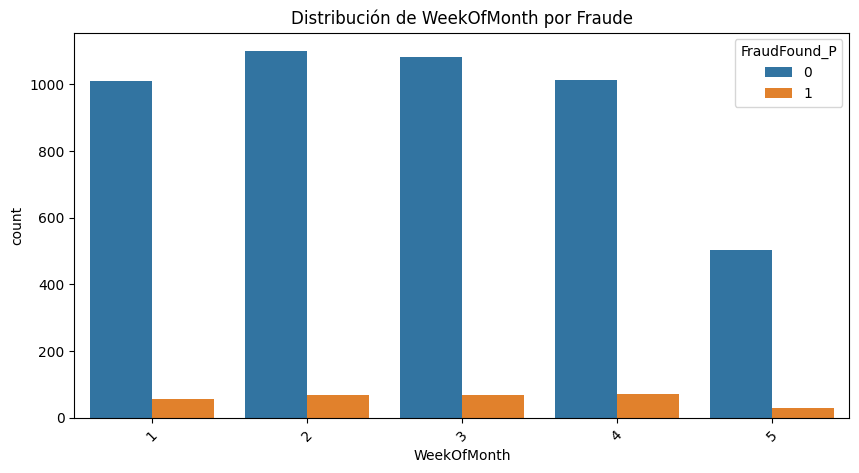

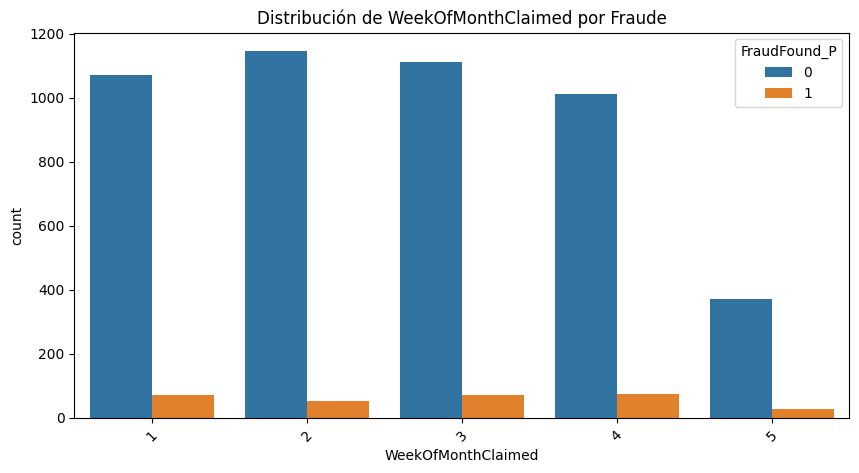

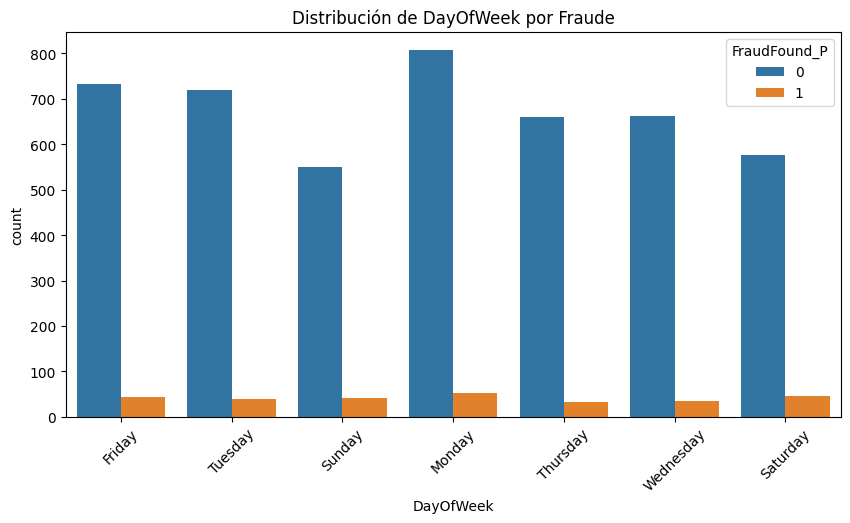

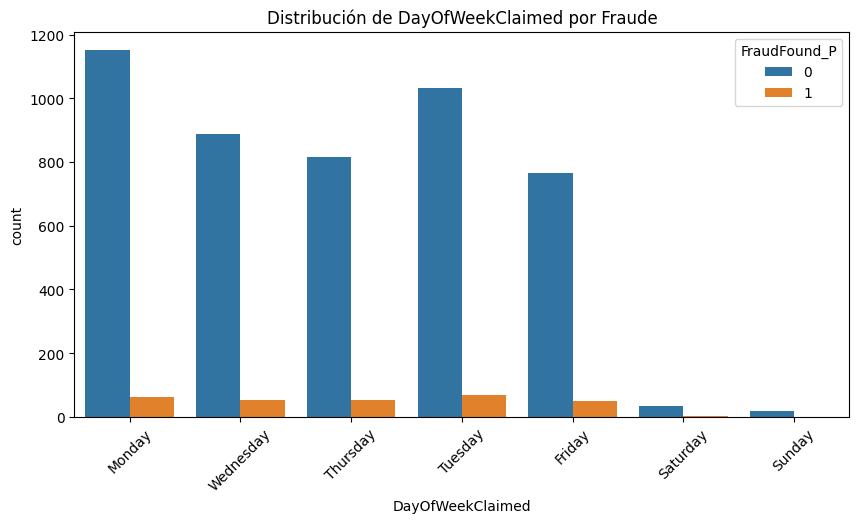

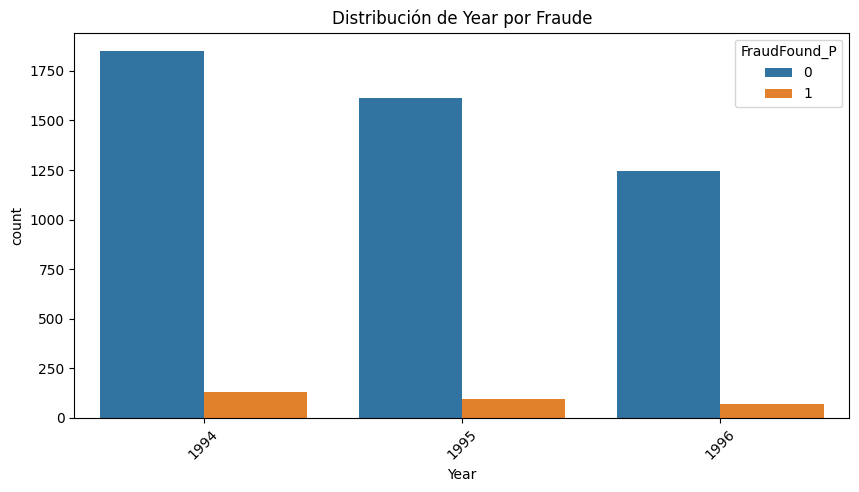

In [ ]:
date_cols=df[['Month','MonthClaimed', 'WeekOfMonth', 'WeekOfMonthClaimed','DayOfWeek','DayOfWeekClaimed','Year']].columns
for col in date_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='FraudFound_P', data=df)
    plt.title(f'Distribución de {col} por Fraude')
    plt.xticks(rotation=45)
    plt.show()

En base a los graficos podemos ver que en el caso de meses no existe algun patron o diferencia apreciable entre 'Month' y 'MonthClaimed'. De igual forma pasa con 'WeekOfMonth' y 'WeekOfMonthClaimed'. En el caso de 'DayOfWeek' y'DayOfWeekClaimed' si se aprecia una diferencia. Especialmente en fines de semana. Para el caso de Year solo tenemos 3 años y lo que nos dice es que las polizas parecen ir a la baja. Sin embargo, el caso de ser fraude o no se mantiene en proporcion. Por lo cual en un primer acercamiento estas variables no parecen ser importantes para un modelo de prediccion. Se evaluara en la siguiente seccion con WOE.

Para las variables categoricas que siguen, tenemos

In [ ]:
categorical_cols=list(set(df.columns)-set(date_cols))
categorical_cols.remove('ID')

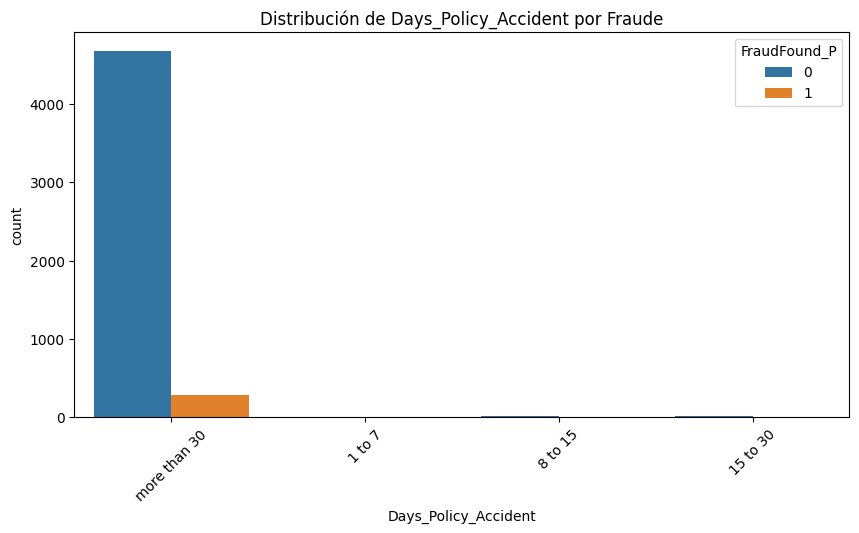

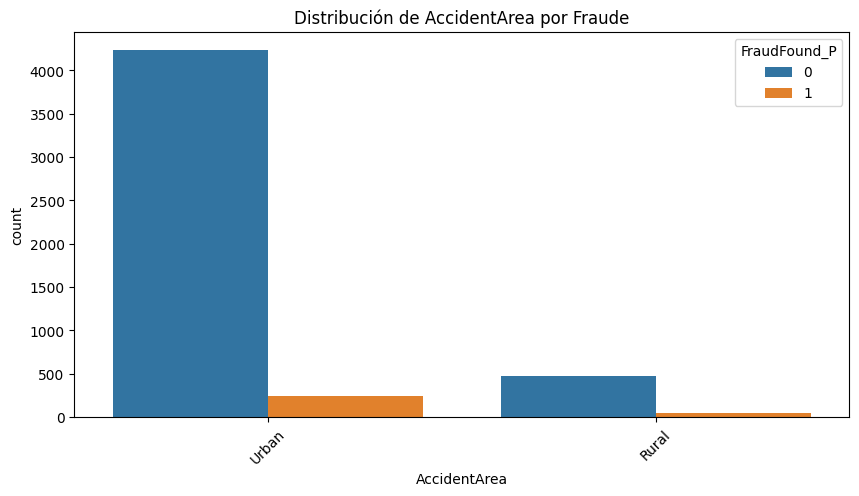

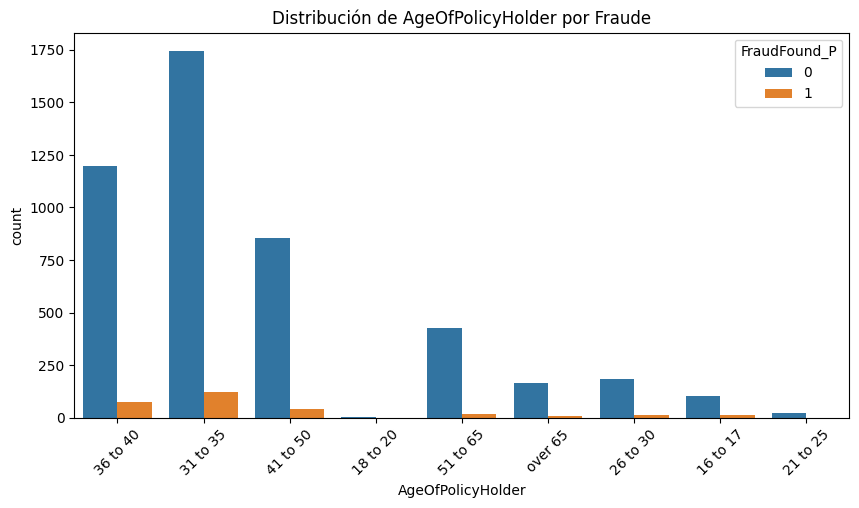

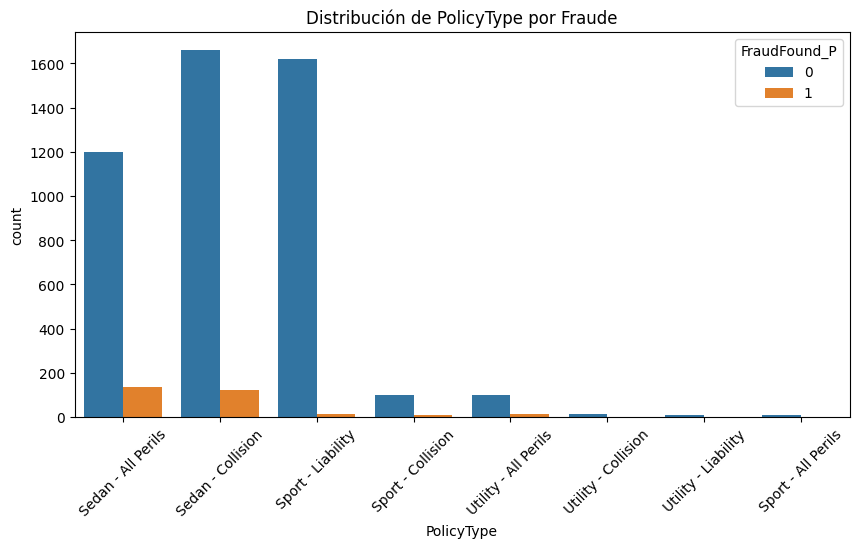

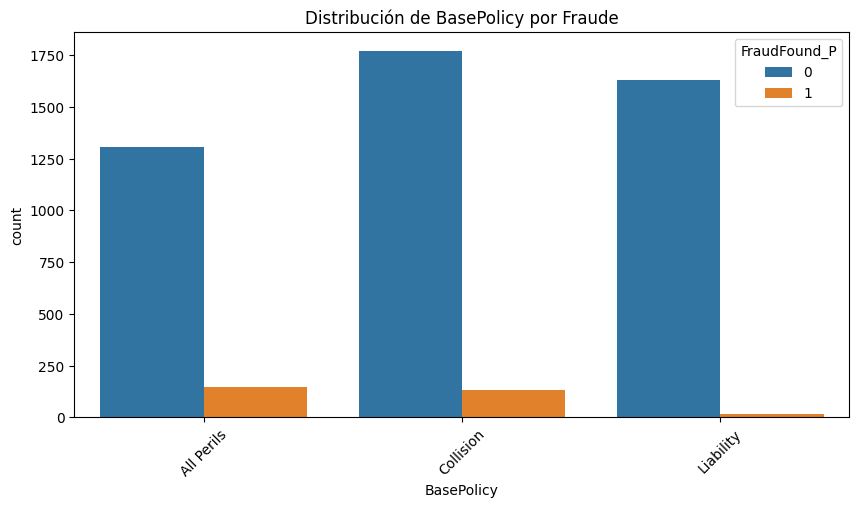

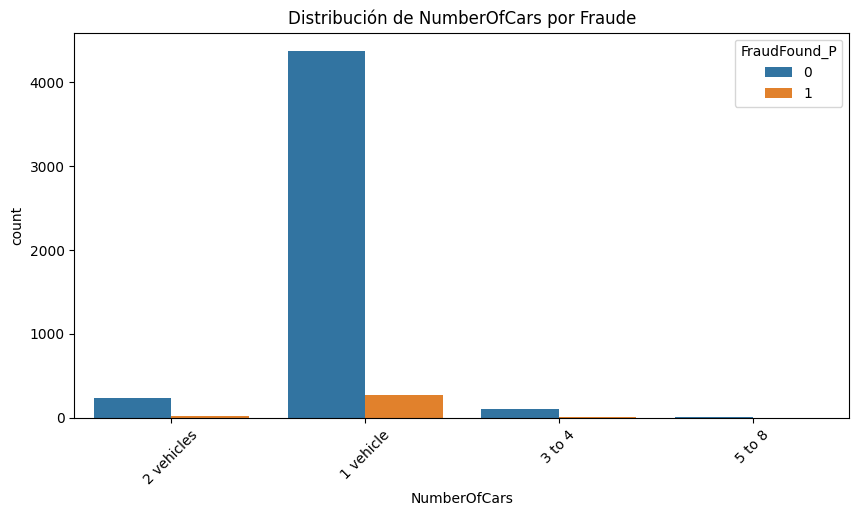

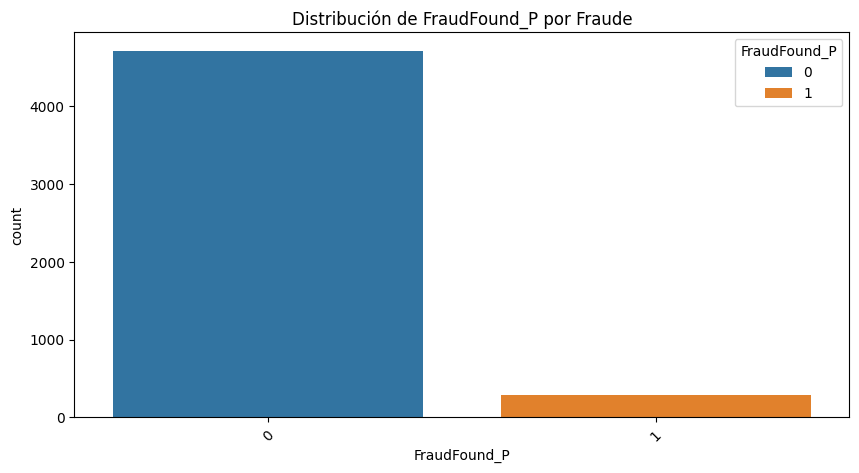

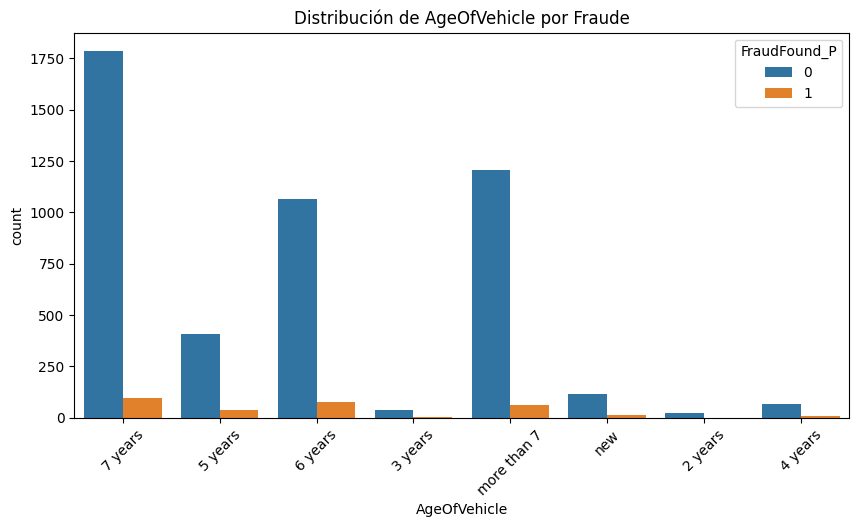

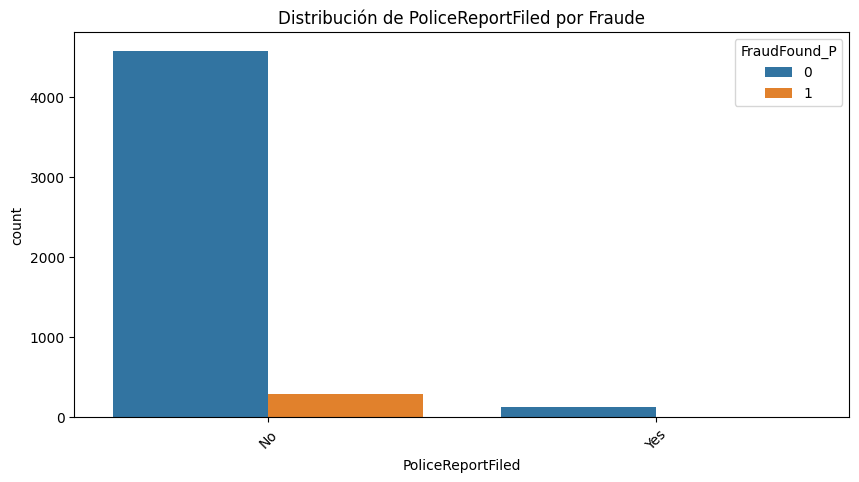

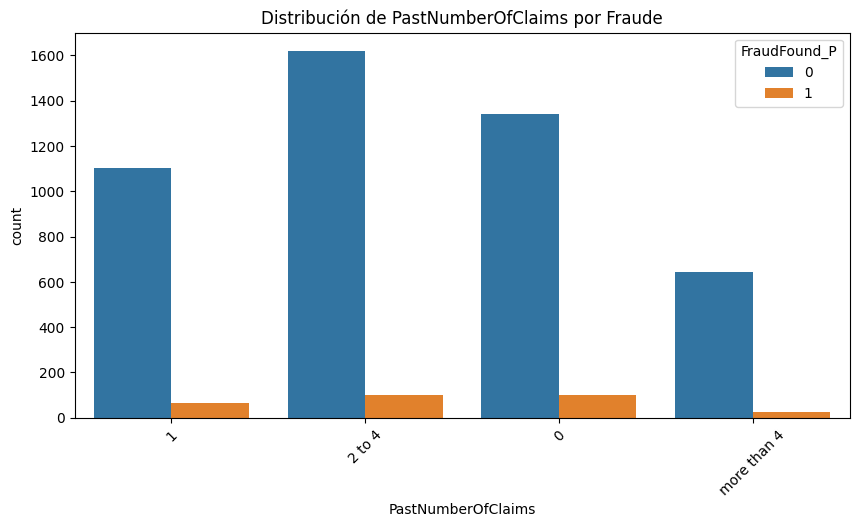

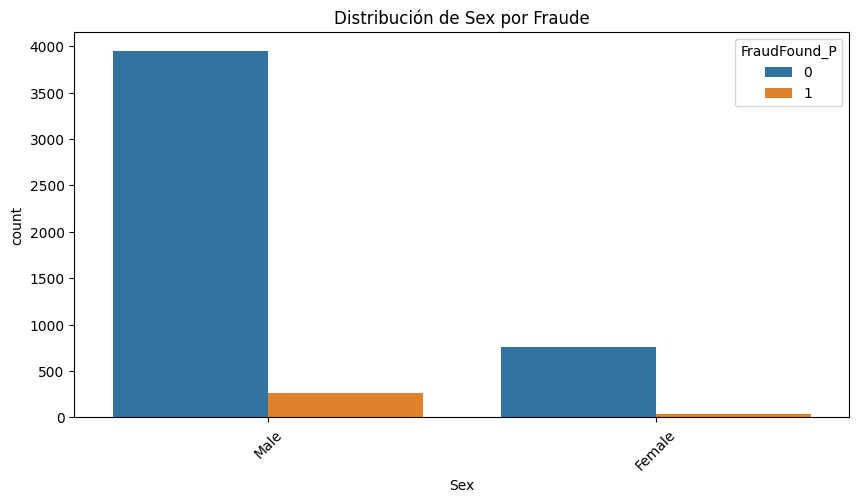

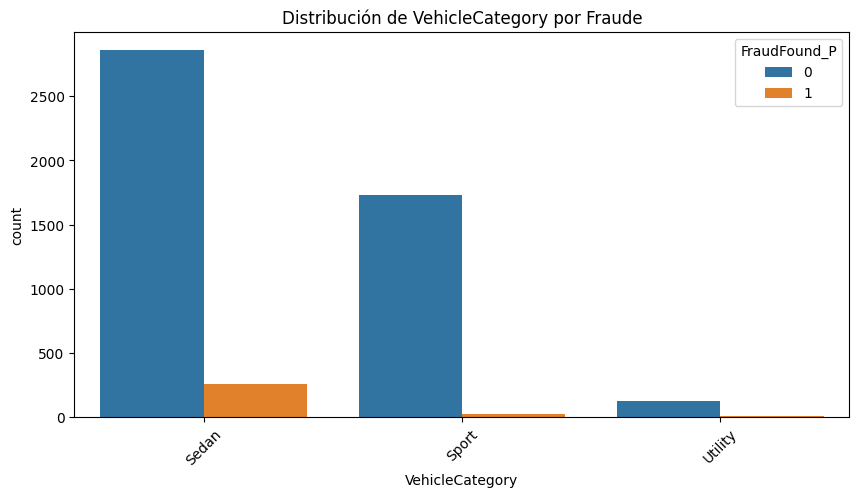

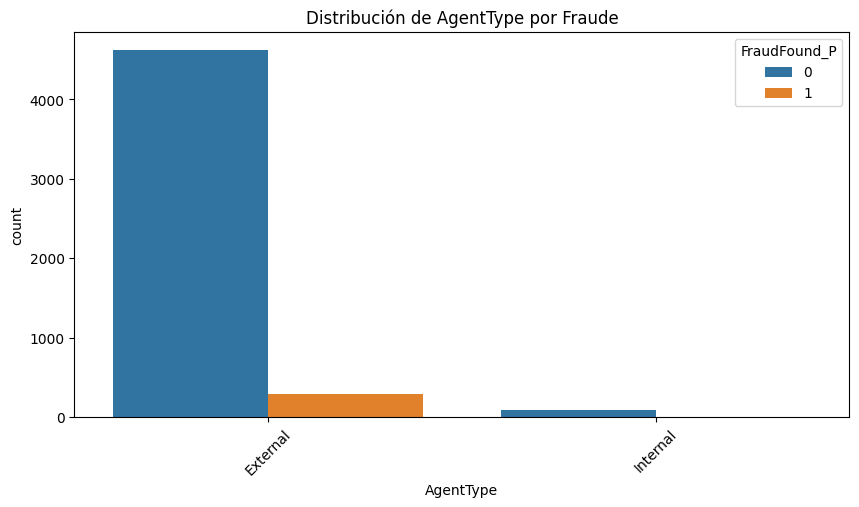

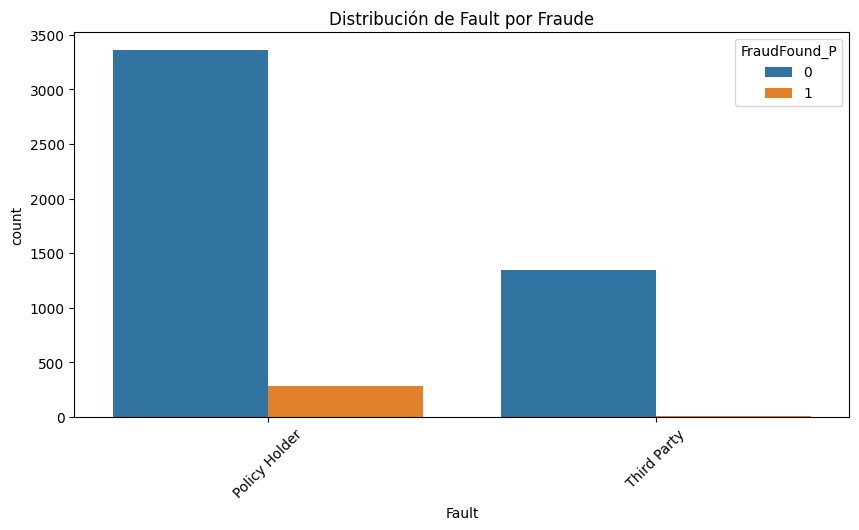

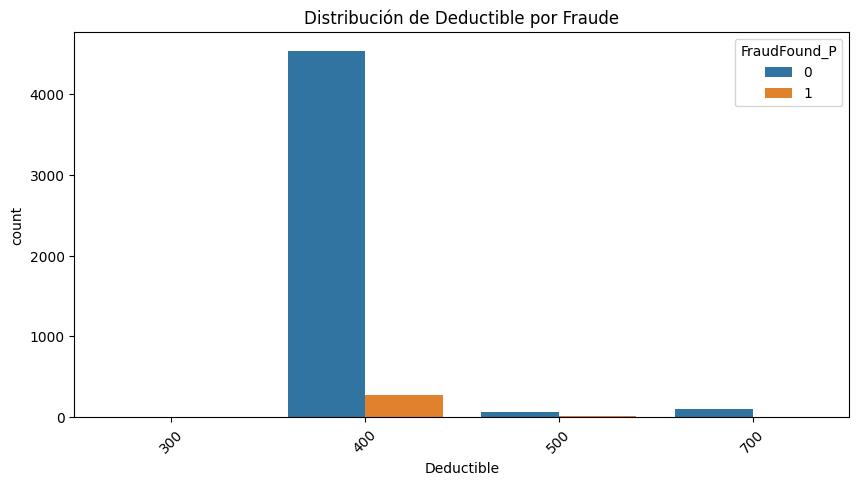

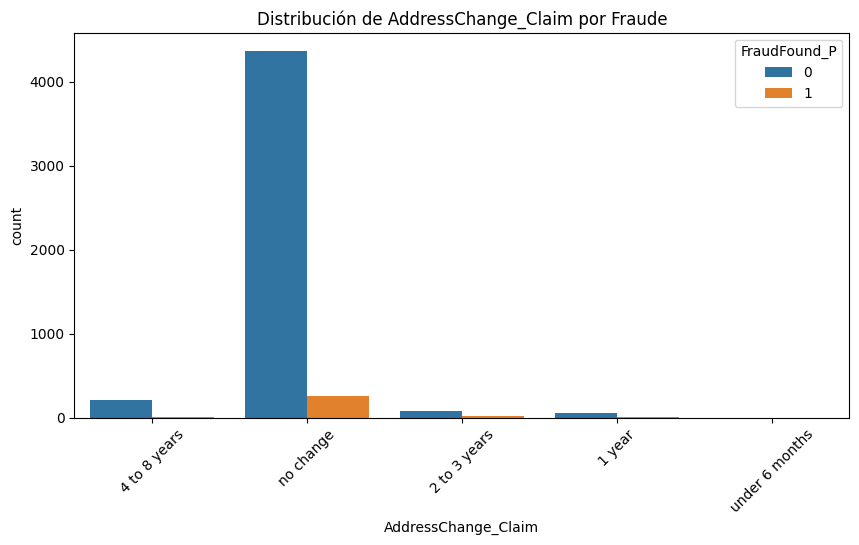

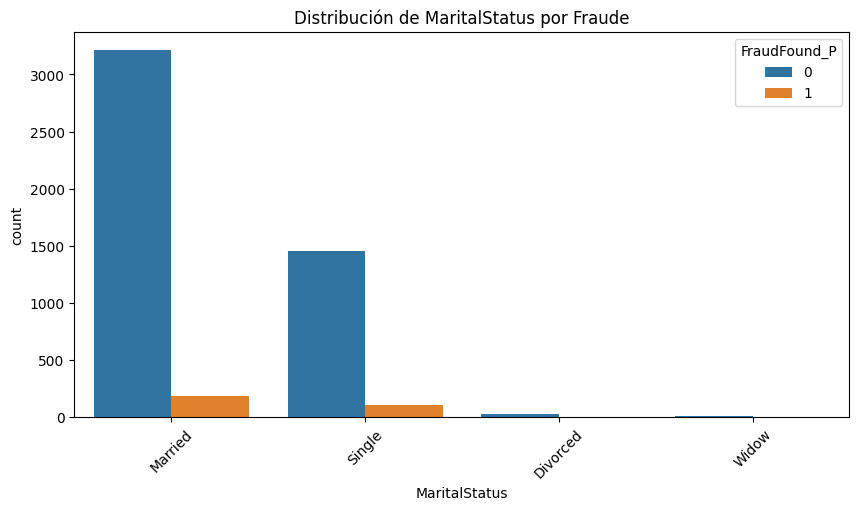

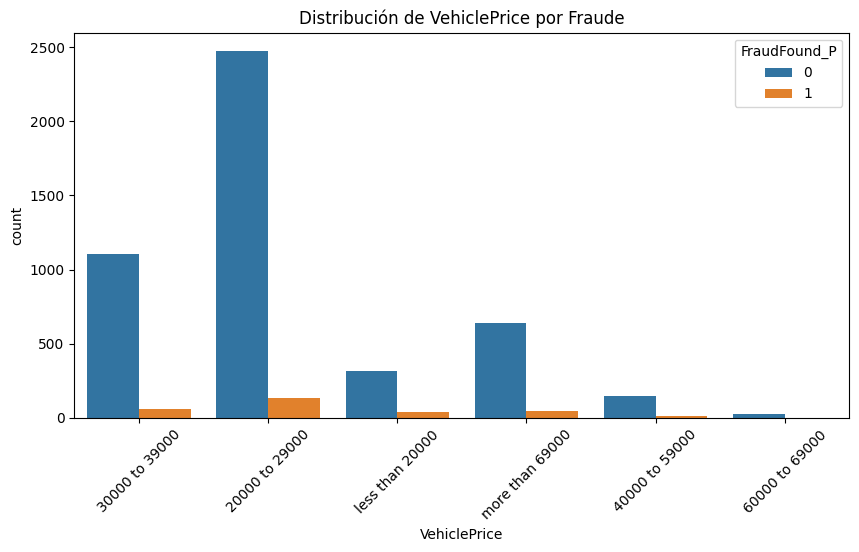

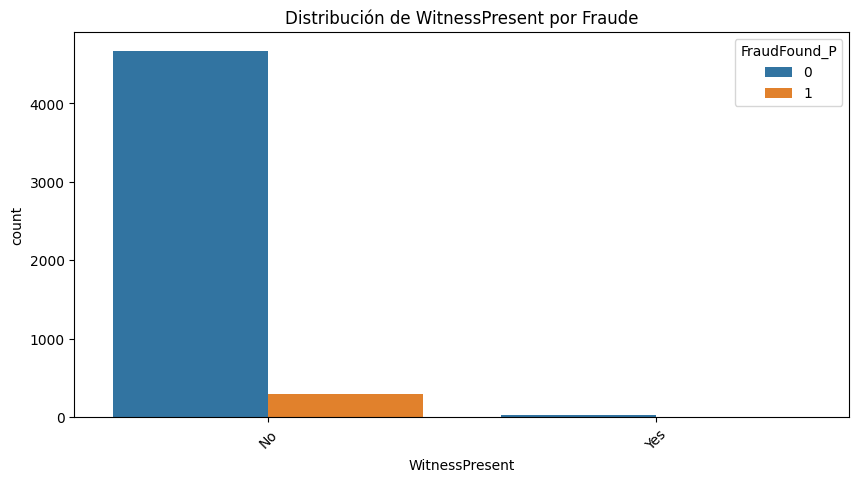

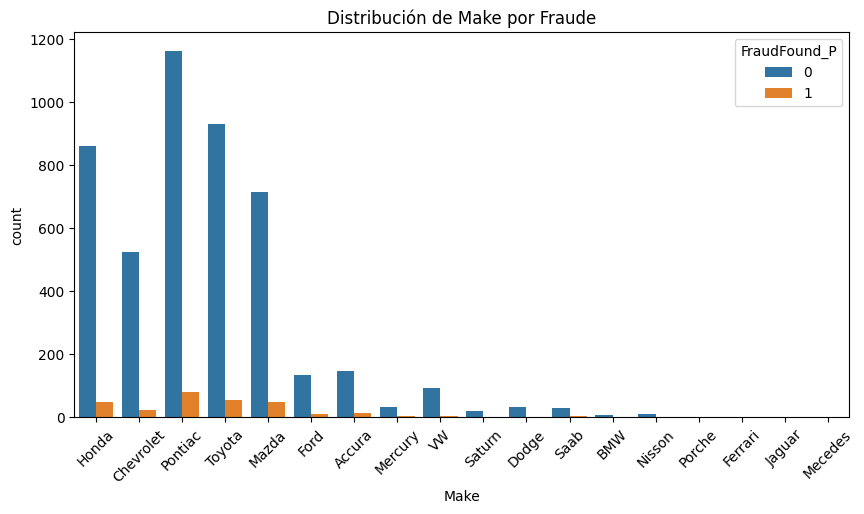

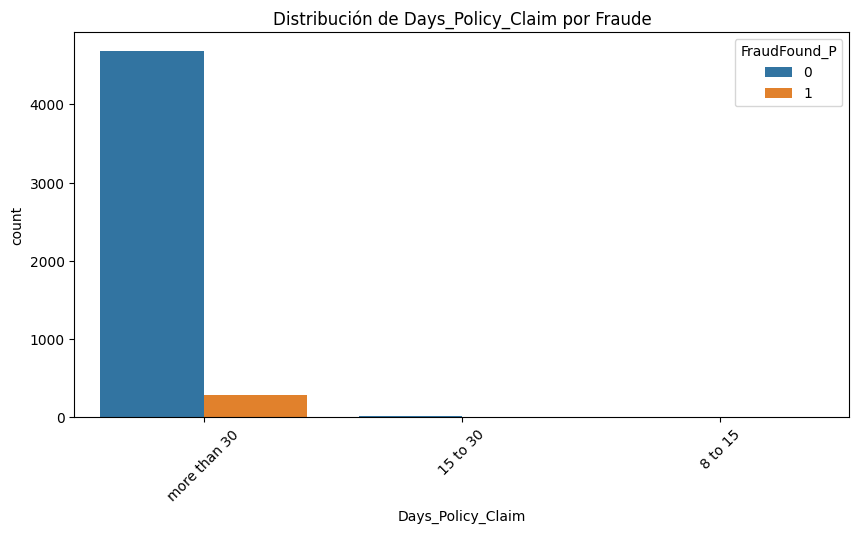

In [ ]:
# Análisis bivariado con la variable objetivo
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='FraudFound_P', data=df)
    plt.title(f'Distribución de {col} por Fraude')
    plt.xticks(rotation=45)
    plt.show()

Algunos puntos a resaltar:
- Casi todas las polizas tiene mas de 30 dias de politica de dias de accidente
- La mayoria de propietarios de las polizas estan en un rango de edad entre los 31 a 40
- El deducible de casi todas las polizas es de 400
- El tipo de poliza mas comun es para vehiculos tipo sedan
- El cambio de direccion no es comun en las polizas
- El numero de quejas se comporta bien variado por lo cual puede ser una buena variable a ocupar ya que no tiene tanta varibilidad
- los vehiculos viejos son mas comunes en las polizas
- Existen mas polizas de hombres que de mujeres
- las personas casadas tienen mas polizas
- los vehiculos con valor de 20,000 a 29,000 son los mas comunes en estas polizas
- el tipo de poliza esta bien distribuido de igual forma lo cual puede ser tambien una buena variable predictora
- Existen modelos como honda y pontiac que son mas representativos en las polizas ya que existen mas casos
- la mayoria de reclamos no tienen testigos ni reporte policial de campo
- La mayoria de polizas involucran solo 1 carro
- la gran mayoria de siniestros son culpa del propietario de la poliza y son en areas urbanas.


Con esto podemos ver que hay muchas variables que estan sezgadas o tienen mas representacion en un grupo. Con el siguiente paso de WOE podremos ver que tan correlacionadas estan y poder elegir cuales no son significativas para crear un modelo.

## Modelado

Quitamos variables que no son relevantes como ID

In [ ]:
df.drop('ID', axis=1,inplace=True)

Vamos a realizar un analisis de las variables que seran relevantes, al igual que la transformacion de estas utilizando weight of evidence (WoE). Para dividiremos el dataset en dos, de esta forma podemos evita data leakage

In [ ]:
from sklearn.model_selection import train_test_split
# 1. Dividir los datos ANTES de cualquier análisis/transformación
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

# Estratificar para mantener proporción de fraudes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Teniendo ambos dataset separados
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [ ]:
df_train.shape[0]

3499

In [ ]:
df_test.shape[0]

1500

WOE nos ayuda a ponderar el efecto de todas las variables involucrando las etiquetas binarias de salida. En general Weight of Evidence (WOE) nos dice el poder precdictivo de una variable independiente en relacion a la variable dependiente. De igual forma tenemos, el information vualue (IV) el cual nos ayuda a determinar que tan fuerte es esta relacion.

fuente:https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

In [ ]:

def calculate_woe_iv_single_variable(df_train, variable, target, show_details=True):
    """
    Calcula WOE e IV para una sola variable usando SOLO datos de entrenamiento

    Parámetros:
    - df_train: DataFrame de entrenamiento
    - variable: nombre de la columna a analizar
    - target: nombre de la columna objetivo (debe ser binaria: 0/1)
    - show_details: si mostrar la tabla detallada

    Retorna:
    - DataFrame con WOE por categoría, IV total
    """

    # Crear tabla de contingencia agrupando por la variable
    df_grouped = df_train.groupby(variable)[target].agg(['count', 'sum']).reset_index()
    df_grouped.columns = [variable, 'Total', 'Bad']  # Bad = eventos (target=1)
    df_grouped['Good'] = df_grouped['Total'] - df_grouped['Bad']  # Good = no eventos (target=0)

    # Calcular totales generales
    total_good = df_grouped['Good'].sum()
    total_bad = df_grouped['Bad'].sum()
    total_records = total_good + total_bad

    # Verificar que tenemos ambas clases
    if total_good == 0 or total_bad == 0:
        raise ValueError(f"La variable objetivo debe tener ambas clases (0 y 1)")

    # Calcular distribuciones porcentuales
    df_grouped['Good_Dist'] = df_grouped['Good'] / total_good
    df_grouped['Bad_Dist'] = df_grouped['Bad'] / total_bad

    # Manejar casos donde una categoría tiene 0 buenos o 0 malos
    # Aplicamos suavizado sumando 0.5 para evitar log(0) o división por 0
    df_grouped['Good_Dist_Smooth'] = (df_grouped['Good'] + 0.5) / (total_good + 0.5)
    df_grouped['Bad_Dist_Smooth'] = (df_grouped['Bad'] + 0.5) / (total_bad + 0.5)

    # Calcular WOE = ln(% Good / % Bad)
    df_grouped['WOE'] = np.log(df_grouped['Good_Dist_Smooth'] / df_grouped['Bad_Dist_Smooth'])

    # Calcular IV para cada categoría = (% Good - % Bad) * WOE
    df_grouped['IV_Category'] = (df_grouped['Good_Dist'] - df_grouped['Bad_Dist']) * df_grouped['WOE']

    # IV total es la suma de IV de todas las categorías
    total_iv = df_grouped['IV_Category'].sum()

    # Calcular tasa de eventos por categoría para interpretación
    df_grouped['Event_Rate'] = df_grouped['Bad'] / df_grouped['Total']

    # Ordenar por WOE para mejor visualización
    df_grouped = df_grouped.sort_values('WOE')

    if show_details:
        print(f"\n=== ANÁLISIS WOE PARA VARIABLE: {variable} ===")
        print(f"Information Value (IV): {total_iv:.4f}")

        # Interpretar el IV
        if total_iv < 0.02:
            interpretation = "Inútil para predicción"
        elif total_iv < 0.1:
            interpretation = "Poder predictivo débil"
        elif total_iv < 0.3:
            interpretation = "Poder predictivo medio"
        elif total_iv < 0.5:
            interpretation = "Poder predictivo fuerte"
        else:
            interpretation = "Sospechoso (posible sobreajuste)"

        print(f"Interpretación IV: {interpretation}")
        print(f"\nDetalle por categoría:")

        # Mostrar tabla formateada
        display_cols = [variable, 'Total', 'Good', 'Bad', 'Event_Rate', 'WOE', 'IV_Category']
        display_df = df_grouped[display_cols].copy()
        display_df['Event_Rate'] = display_df['Event_Rate'].map('{:.3f}'.format)
        display_df['WOE'] = display_df['WOE'].map('{:.4f}'.format)
        display_df['IV_Category'] = display_df['IV_Category'].map('{:.4f}'.format)

        print(display_df.to_string(index=False))
        print("-" * 80)

    return df_grouped, total_iv


In [ ]:
def calculate_woe_iv_all_variables(df_train, target_col, exclude_cols=None):
    """
    Calcula WOE e IV para todas las variables categóricas en el dataset

    Parámetros:
    - df_train: DataFrame de entrenamiento
    - target_col: nombre de la columna objetivo
    - exclude_cols: lista de columnas a excluir del análisis

    Retorna:
    - Diccionario con tablas WOE por variable
    - DataFrame resumen con IV de todas las variables
    """

    if exclude_cols is None:
        exclude_cols = []

    # Identificar columnas categóricas (excluyendo la variable objetivo)
    categorical_cols = df_train.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols = [col for col in categorical_cols if col != target_col and col not in exclude_cols]

    woe_tables = {}
    iv_summary = []

    print("=== CALCULANDO WOE E IV PARA TODAS LAS VARIABLES ===\n")

    for col in categorical_cols:
        try:
            woe_table, iv_value = calculate_woe_iv_single_variable(
                df_train, col, target_col, show_details=True
            )
            woe_tables[col] = woe_table
            iv_summary.append({'Variable': col, 'IV': iv_value})

        except Exception as e:
            print(f"Error procesando variable {col}: {str(e)}")
            continue

    # Crear DataFrame resumen ordenado por IV descendente
    iv_summary_df = pd.DataFrame(iv_summary).sort_values('IV', ascending=False)

    print("\n=== RESUMEN DE INFORMATION VALUES ===")
    print(iv_summary_df.to_string(index=False))

    return woe_tables, iv_summary_df

In [ ]:
def apply_woe_transformation(df, woe_tables, target_col):
    """
    Aplica la transformación WOE a un dataset usando las tablas WOE calculadas
    en entrenamiento

    Parámetros:
    - df: DataFrame a transformar (puede ser train o test)
    - woe_tables: diccionario con tablas WOE de cada variable
    - target_col: nombre de la columna objetivo

    Retorna:
    - DataFrame transformado con valores WOE
    """

    df_transformed = df.copy()

    print("=== APLICANDO TRANSFORMACIÓN WOE ===")

    for variable, woe_table in woe_tables.items():
        if variable in df.columns:
            # Crear diccionario de mapeo: categoría -> WOE
            woe_mapping = dict(zip(woe_table[variable], woe_table['WOE']))

            # Aplicar transformación
            df_transformed[variable] = df[variable].map(woe_mapping)

            # Manejar categorías no vistas en entrenamiento
            missing_mask = df_transformed[variable].isnull()
            if missing_mask.sum() > 0:
                # Asignar WOE neutro (0) a categorías no vistas
                df_transformed.loc[missing_mask, variable] = 0
                print(f"Variable {variable}: {missing_mask.sum()} registros con categorías no vistas (asignado WOE=0)")

            # Eliminar variable original (opcional)
            # df_transformed = df_transformed.drop(columns=[variable])

    print("Transformación WOE completada.")
    return df_transformed

In [ ]:
woe_tables, iv_summary = calculate_woe_iv_all_variables(df_train, 'FraudFound_P')

=== CALCULANDO WOE E IV PARA TODAS LAS VARIABLES ===


=== ANÁLISIS WOE PARA VARIABLE: Month ===
Information Value (IV): 0.0880
Interpretación IV: Poder predictivo débil

Detalle por categoría:
Month  Total  Good  Bad Event_Rate     WOE IV_Category
  Mar    318   291   27      0.085 -0.4189      0.0184
  Aug    245   226   19      0.078 -0.3274      0.0080
  Jan    318   295   23      0.072 -0.2481      0.0058
  May    338   314   24      0.071 -0.2274      0.0051
  Feb    278   261   17      0.061 -0.0755      0.0003
  Oct    285   268   17      0.060 -0.0491      0.0001
  Jun    275   260   15      0.055  0.0420      0.0002
  Sep    293   277   16      0.055  0.0427      0.0002
  Jul    303   287   16      0.053  0.0781      0.0007
  Apr    285   274   11      0.039  0.3929      0.0115
  Nov    280   270   10      0.036  0.4692      0.0154
  Dec    281   272    9      0.032  0.5766      0.0222
--------------------------------------------------------------------------------

=== ANÁLI

In [ ]:
df_train_woe = apply_woe_transformation(df_train, woe_tables, 'FraudFound_P')

=== APLICANDO TRANSFORMACIÓN WOE ===
Transformación WOE completada.


In [ ]:
df_train_woe.FraudFound_P.value_counts(normalize=True)

,proportion
FraudFound_P,
0,0.941698
1,0.058302


de acuerdo a bibliografia es valores por debajo de 0.02 no son relevantes para la prediccion por lo cual los quitaremos

En la generacion de los IV y WOE se incluyo esto y en general las reglas son las siguientes:
- iv < 0.02: "Inútil para predicción"
- iv < 0.1: "Poder predictivo débil"
- iv < 0.3: "Poder predictivo medio"
- iv < 0.5: "Poder predictivo fuerte"
- iv > 0.5 "Sospechoso (posible sobreajuste)"

In [ ]:
selected_col=iv_summary[iv_summary['IV']>= 0.02].Variable.tolist()
selected_col

['Fault',
 'PolicyType',
 'BasePolicy',
 'VehicleCategory',
 'Month',
 'AddressChange_Claim',
 'MonthClaimed',
 'VehiclePrice',
 'Make',
 'DayOfWeek',
 'AgeOfVehicle',
 'Deductible',
 'Sex',
 'PastNumberOfClaims',
 'AccidentArea',
 'AgeOfPolicyHolder',
 'AgentType',
 'WeekOfMonthClaimed',
 'Days_Policy_Claim',
 'Days_Policy_Accident',
 'DayOfWeekClaimed',
 'Year']

Ahora que los datos son numericos se pueden comprar para poder visualizar datos que esten muyy correlacionados y que podamos elegir cual tener. Como es el caso de PolicyType, el cual esta muy relacionado con BasePolicy y VehicleCategory, por lo cual no es necesario tener los tres, por lo cual se conserva la variable con mayor information value (IV) y ademas se conserva VehicleCategory tener un valor de IV estable no tan sezgado.
Este caso pasa para las siguentes caracteristicas por lo cual se conservara la que tenga mayor IV
- Esto mismo pasa con Month y MonthClaimed
- AddressChange_Claim y Deductible
- AgeOfVehicle y AgeOfPolicyHolder

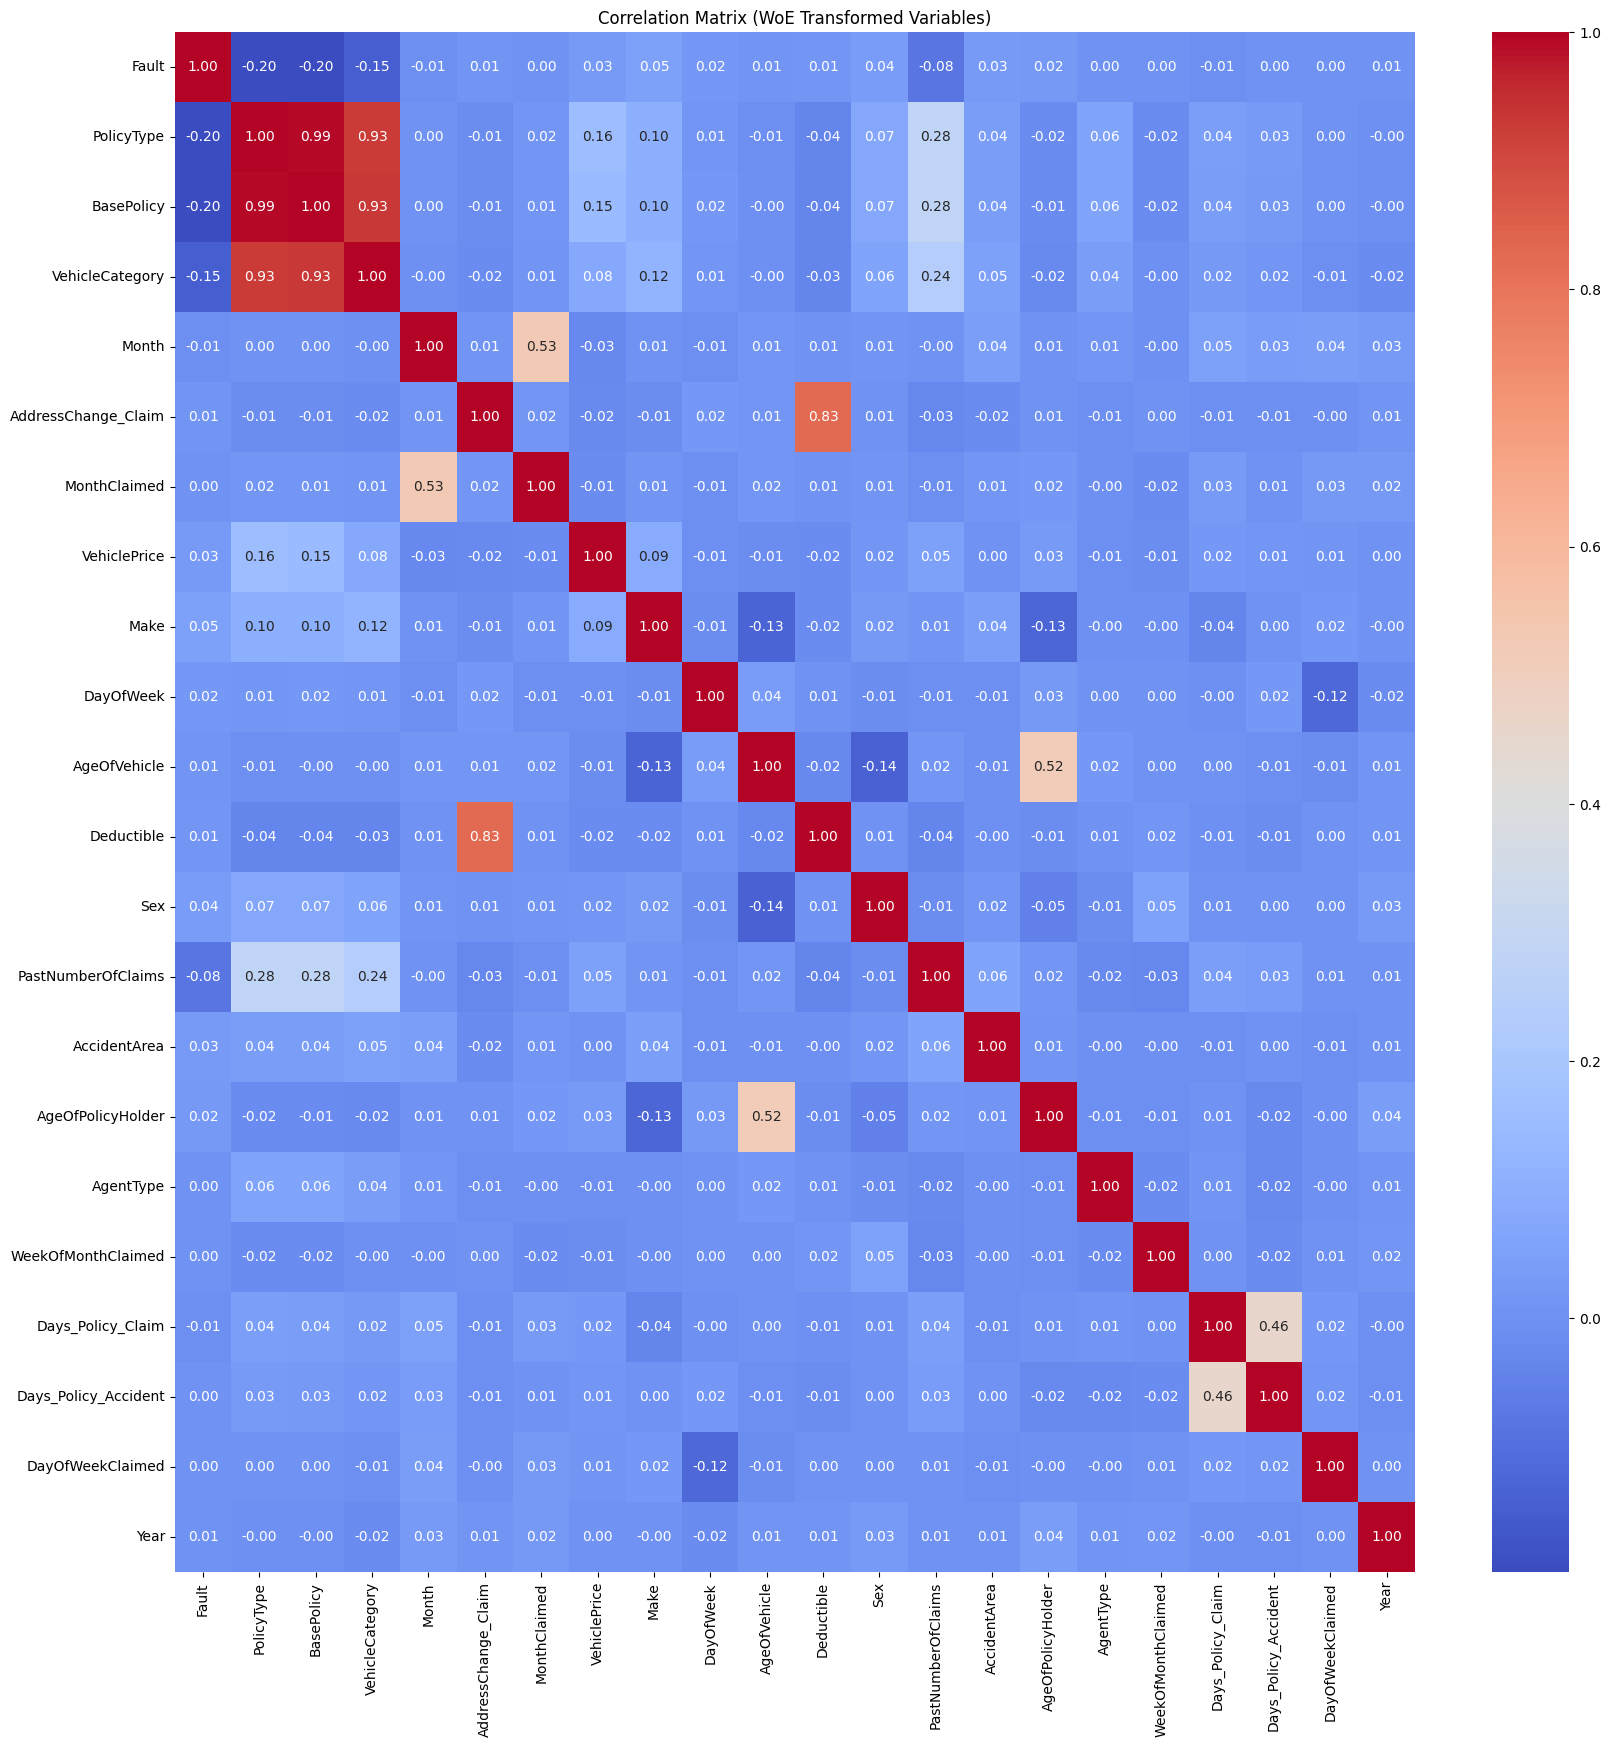

In [ ]:
corr_matrix=df_train_woe[selected_col].corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix (WoE Transformed Variables)")
plt.show()

In [ ]:
selected_col.remove('BasePolicy')
selected_col.remove('MonthClaimed')
selected_col.remove('AddressChange_Claim')
selected_col.remove('AgeOfPolicyHolder')
selected_col

['Fault',
 'PolicyType',
 'VehicleCategory',
 'Month',
 'VehiclePrice',
 'Make',
 'DayOfWeek',
 'AgeOfVehicle',
 'Deductible',
 'Sex',
 'PastNumberOfClaims',
 'AccidentArea',
 'AgentType',
 'WeekOfMonthClaimed',
 'Days_Policy_Claim',
 'Days_Policy_Accident',
 'DayOfWeekClaimed',
 'Year']

## Modelo base

se va a utilizar una regresion logistica como modelo, en este caso woe esta especialmente hecho para funcionar con este, en este caso tenemos un problema de desbalance de clases ya que tenemos una proporcion de cerca del 94% de casos detectados como no fraude contra solo el 6% que lo es.

In [ ]:
df_train_woe.FraudFound_P.value_counts(normalize=True)

,proportion
FraudFound_P,
0,0.941698
1,0.058302


Para lidiar con esto, y ya que tenemos algunas de las variables o caracteristicas a ocupar en el modelo. Se plantearan 4 modelos base que serviran de comparacion para poder realizar posteriormente un tuning al mejor modelo. En este escenario los modelos a comparar seran lo siguientes.

- regresion logistica sin class_weight modificado para saber si existe una diferencia al jugar con este parametro
- regresion logistica + class_weight = balanced el cual asigna pesos inversamente proporcionales a la frecuencia de las clases
- regresion logistica + {0: 1, 1: 15} ya que (94:6 ≈ 15:1) considerando que los errores en la clase minoritaria pueden ser 15 veces más costosos
- Random forest + class_weight se incluira como comparativa para detectar si este es un modelo que puede llegar  a ser viable. Aunque no se beneficie del WOE


In [ ]:
# caracteristicas elegidas para el entrenamiento
X_train_woe= df_train_woe[selected_col]
y_train_woe = df_train_woe['FraudFound_P']

In [ ]:
# caractetisticas elegidas y tranformacion del set de prueba
df_test_woe = apply_woe_transformation(df_test, woe_tables, 'FraudFound_P')


=== APLICANDO TRANSFORMACIÓN WOE ===
Variable Make: 2 registros con categorías no vistas (asignado WOE=0)
Transformación WOE completada.


In [ ]:
X_test_woe= df_test_woe[selected_col]
y_test_woe = df_test_woe['FraudFound_P']

In [ ]:
y_test_woe.value_counts(normalize=False)

,count
FraudFound_P,
0,1412
1,88


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from sklearn.metrics import roc_auc_score,classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score

models = {
"Logistic Regression base": LogisticRegression(max_iter=1000,random_state=42),
"Logistic Regression with weight": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l2',solver='liblinear',C=0.01),
"Logistic Regression with ratios": LogisticRegression(max_iter=1000,random_state=42,class_weight={0: 1, 1: 15}),
"Random Forest":RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100),
}

In [ ]:
for name, model in models.items():
  model.fit(X_train_woe, y_train_woe)
  y_pred = model.predict(X_test_woe)
  y_prob = model.predict_proba(X_test_woe)[:, 1]
  print(f"Modelo Usado: {name}")
  print("AUC:", roc_auc_score(y_test_woe, y_prob))
  print("Confusion Matrix:\n", confusion_matrix(y_test_woe, y_pred))
  print("Precision Score:", precision_score(y_test, y_pred))
  print("Recall Score:", recall_score(y_test_woe, y_pred))
  print("F1 Score:", f1_score(y_test_woe, y_pred))
  print("\n")


Modelo Usado: Logistic Regression base
AUC: 0.7725502189029101
Confusion Matrix:
 [[1410    2]
 [  88    0]]
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0


Modelo Usado: Logistic Regression with weight
AUC: 0.7815719160442958
Confusion Matrix:
 [[823 589]
 [  6  82]]
Precision Score: 0.12220566318926974
Recall Score: 0.9318181818181818
F1 Score: 0.2160737812911726


Modelo Usado: Logistic Regression with ratios
AUC: 0.771640806077775
Confusion Matrix:
 [[977 435]
 [ 33  55]]
Precision Score: 0.11224489795918367
Recall Score: 0.625
F1 Score: 0.1903114186851211


Modelo Usado: Random Forest
AUC: 0.7562411473087818
Confusion Matrix:
 [[1412    0]
 [  88    0]]
Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


En general podemos observar que los modelos tienen valores AUC de la curva muy similares, sin embargo esto no es un indicativo de que son mejores. Ya que, al ser un set de datos tan desbalanceado es mejor mirar las metricas como F1-score el cual balancea la Presicion y el recall, el cual nos indica valores muy bajos.

Graficamente podemos ver la curva ROC-AUC de la siguiente forma y en contraste las curvas de PR que nos sirven mejor

Recordando lo siguiente:


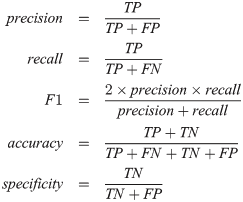

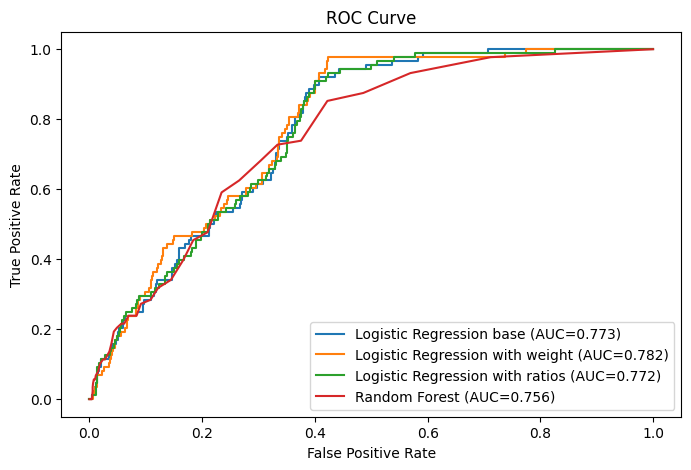

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score


def plot_roc(ax,X_test, y_test, model, title):
    y_test_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = roc_curve(y_test, y_test_pred)
    auc = roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} (AUC={auc:.3f})")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
for name, model in models.items():
  plot_roc(ax,X_test_woe, y_test_woe, model, name)


 En nuestro escenario al tener un data set sumamente desbalanceado, tenemos que ocupar otro tipo de metricas, en este caso al ser una clasificacion binaria se recomienda usar la curva PR lo cual quiere decir presicion vs recall. Como se puede ver en las formulas de arriba las clasificaciones binarias son un intercambio entre precision y recall al aumentar una, sacrificacmos otra. Por lo tanto si quueremos probar que un modelo tenga un mejor redimiento tendran que aumentar la relacion de las dos.

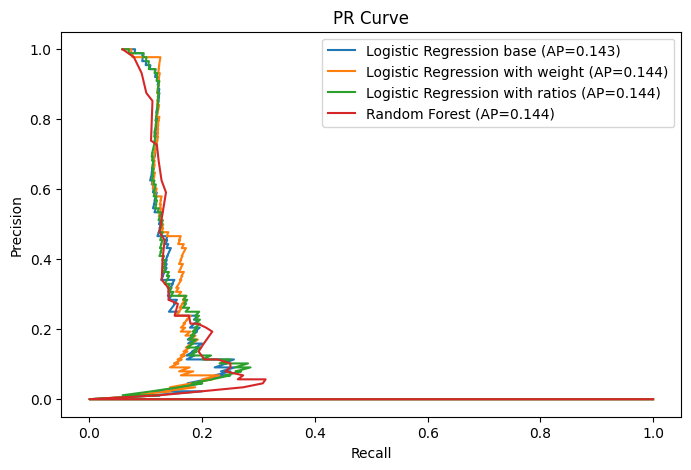

In [ ]:
from sklearn.metrics import precision_recall_curve,roc_curve,roc_auc_score,average_precision_score

def plot_roc(ax,X_test, y_test, model, title):
    y_test_pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = precision_recall_curve(y_test, y_test_pred)
    ap = average_precision_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} (AP={ap:.3f})")

    ax.set_title('PR Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc=0)

# Plot all PR into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
for name, model in models.items():
  plot_roc(ax,X_test_woe, y_test_woe, model, name)

Aqui es donde se puede ver el desempeño de los modelos el cual es bajo para diferenciar las clases individuales. Ya que en ese caso lo que se busca es mejorar la prediccion de que un caso sea fraude o no. Es importante definir que se quiere maximizar.
El recall es crítico en situaciones donde los falsos negativos son costosos, mientras que la precisión es importante cuando los falsos positivos son más problemáticos.
En el contexto de la detección de fraude, un falso negativo ocurre cuando el modelo clasifica una póliza fraudulenta como legítima. El costo de este error es muy alto: la compañía de seguros paga una reclamación fraudulenta, lo que resulta en una pérdida financiera directa.

En nuestros modelos probados el que mejor desempeño tuvo en recall como en f1-score fue la regresion logistica con class_weight balanced, por lo cual es el que utilziaremos como base y lo mejoraremos.

## Buscando el mejor modelo

Para empezar a buscar el mejor modelo se aplicara al modelo base doferentes arreglos para problar si podemos mejorar las metricas, en especial el recall y mantener la presicion en un valor por arriba del 10% minimo. De iguall forma tomando en cuenta el f1-score como metrica de balance.

Para probar diferentes arreglos se dividira el set de test en 2 uno de test para probar los parametros y cmabios y uno de validacion para ver que tan efectuivos son los cambios

In [ ]:
# dividiendo el data set
X_tests, X_val, y_tests, y_val = train_test_split(X_test, y_test
                                                  , test_size=0.5
                                                  , stratify=y_test
                                                  , random_state=42)

In [ ]:
df_val = pd.concat([X_val, y_val], axis=1)
df_tests = pd.concat([X_tests, y_tests], axis=1)

In [ ]:
print(df_tests.shape[0])
print(df_val.shape[0])

750
750


In [ ]:
# tranformar las funciones hechas de WOE a una clase para poder ocuparlas en una pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class WoETransformer(BaseEstimator, TransformerMixin):
    def __init__(self, target_col, exclude_cols=None):
        self.target_col = target_col
        self.exclude_cols = exclude_cols if exclude_cols is not None else []
        self.woe_tables_ = None
        self.iv_summary_ = None

    def fit(self, X, y):
        df_train = X.copy()
        df_train[self.target_col] = y
        self.woe_tables_, self.iv_summary_ = calculate_woe_iv_all_variables(
            df_train,
            target_col=self.target_col,
            exclude_cols=self.exclude_cols
        )
        return self

    def transform(self, X):
        return apply_woe_transformation(
            df=X,
            woe_tables=self.woe_tables_,
            target_col=self.target_col
        )

    def get_iv_summary(self):
        return self.iv_summary_

Los modelos que se van evaluar tienen como base el ocupar class_weight='Balaced', se modificara algunos hiperparametros.

In [ ]:
woe_tran=WoETransformer(target_col='FraudFound_P')

In [ ]:
woe_tran.fit(X_train, y_train)

WoETransformer(exclude_cols=[], target_col='FraudFound_P')

In [ ]:
X_train_woe=woe_tran.transform(X_train)

In [ ]:
X_test_woe=woe_tran.transform(X_tests)

In [ ]:
X_val_woe=woe_tran.transform(X_val)

In [ ]:

selected_col

['Fault',
 'PolicyType',
 'VehicleCategory',
 'Month',
 'VehiclePrice',
 'Make',
 'DayOfWeek',
 'AgeOfVehicle',
 'Deductible',
 'Sex',
 'PastNumberOfClaims',
 'AccidentArea',
 'AgentType',
 'WeekOfMonthClaimed',
 'Days_Policy_Claim',
 'Days_Policy_Accident',
 'DayOfWeekClaimed',
 'Year']

In [ ]:
models = {
"Logistic Regression base": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced'),
"Logistic Regression 1": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l2',solver='liblinear',C=0.01),
"Logistic Regression 2": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l2',solver='liblinear',C=0.1),
"Logistic Regression 3": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l2',solver='liblinear',C=0.10),
"Logistic Regression 4": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l1',solver='liblinear',C=0.1),
"Logistic Regression 5": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l1',solver='liblinear',C=1),
"Logistic Regression 6": LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l1',solver='liblinear',C=10),
}

In [ ]:
for name, model in models.items():
  model.fit(X_train_woe[selected_col], y_train)
  y_pred = model.predict(X_test_woe[selected_col])
  y_prob = model.predict_proba(X_test_woe[selected_col])[:, 1]
  print(f"Modelo Usado: {name}")
  print("AUC:", roc_auc_score(y_tests, y_prob))
  print("Confusion Matrix:\n", confusion_matrix(y_tests, y_pred))
  print("Precision Score:", precision_score(y_tests, y_pred))
  print("Recall Score:", recall_score(y_tests, y_pred))
  print("F1 Score:", f1_score(y_tests, y_pred))
  print("\n")


Modelo Usado: Logistic Regression base
AUC: 0.7770731393252639
Confusion Matrix:
 [[474 232]
 [ 14  30]]
Precision Score: 0.11450381679389313
Recall Score: 0.6818181818181818
F1 Score: 0.19607843137254902


Modelo Usado: Logistic Regression 1
AUC: 0.7914305949008499
Confusion Matrix:
 [[424 282]
 [  2  42]]
Precision Score: 0.12962962962962962
Recall Score: 0.9545454545454546
F1 Score: 0.22826086956521738


Modelo Usado: Logistic Regression 2
AUC: 0.7888552665464847
Confusion Matrix:
 [[461 245]
 [ 11  33]]
Precision Score: 0.11870503597122302
Recall Score: 0.75
F1 Score: 0.20496894409937888


Modelo Usado: Logistic Regression 3
AUC: 0.7888552665464847
Confusion Matrix:
 [[461 245]
 [ 11  33]]
Precision Score: 0.11870503597122302
Recall Score: 0.75
F1 Score: 0.20496894409937888


Modelo Usado: Logistic Regression 4
AUC: 0.7936840072109194
Confusion Matrix:
 [[454 252]
 [  9  35]]
Precision Score: 0.12195121951219512
Recall Score: 0.7954545454545454
F1 Score: 0.21148036253776434


Model

En base a los resultados parce que los parametros que mas afectan al modelo y lo mejoran es la regularizacion L2 y el hiperparametro C, se procedera con el modelo 1 el cual tiene regularizacion l1 y C=0.01. Un punto a tomar en cuenta es que actulmente las variables que se estan tomando en cuenta son 18. Analizando la importancia de estas en el modelo podemos ver que hay caracteristicas como:

PastNumberOfClaims,Days_Policy_Accident,Days_Policy_Claim y Year
las cuales no figuran mucho en la aportacion al modelo por lo cual se eliminaran de las variables de entrada. quedando finalmente.


In [ ]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ("woe", WoETransformer(target_col='FraudFound_P')),
    ("logreg", LogisticRegression(max_iter=1000,random_state=42,class_weight='balanced',penalty= 'l2',solver='liblinear',C=0.01))
])



In [ ]:
pipeline

Pipeline(steps=[('woe',
                 WoETransformer(exclude_cols=[], target_col='FraudFound_P')),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [ ]:
pipeline.fit(X_train[selected_col], y_train)

Pipeline(steps=[('woe',
                 WoETransformer(exclude_cols=[], target_col='FraudFound_P')),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

<Axes: title={'center': 'Feature Importance'}>

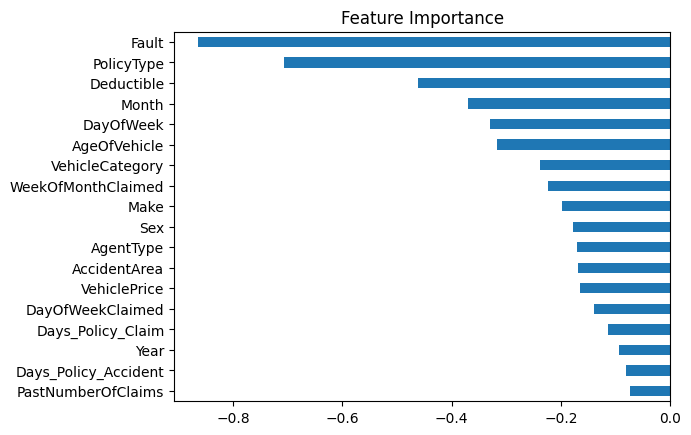

In [ ]:
importance = pipeline["logreg"].coef_[0]
#importance is a list so you can plot it.
feat_importances = pd.Series(importance,X_train_woe[selected_col].columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Cambiando la entrada de variables

In [ ]:
selected_col=['Fault',
 'PolicyType',
 'VehicleCategory',
 'Month',
 'VehiclePrice',
 'Make',
 'DayOfWeek',
 'AgeOfVehicle',
 'Deductible',
 'Sex',
 'AccidentArea',
 'AgentType',
 'WeekOfMonthClaimed']
pipeline.fit(X_train[selected_col], y_train)

Pipeline(steps=[('woe',
                 WoETransformer(exclude_cols=[], target_col='FraudFound_P')),
                ('logreg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, random_state=42,
                                    solver='liblinear'))])

Con este cambio el modelo sigue teniendo un desempeño similar por lo cual se evaluara con el set de validacion para determinar su eficacia

In [ ]:
# set de prueba
y_pred = pipeline.predict(X_tests[selected_col])
y_prob = pipeline.predict_proba(X_tests[selected_col])[:, 1]
print(f"Modelo Usado: {name}")
print("AUC:", roc_auc_score(y_tests, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_tests, y_pred))
print("Precision Score:", precision_score(y_tests, y_pred))
print("Recall Score:", recall_score(y_tests, y_pred))
print("F1 Score:", f1_score(y_tests, y_pred))
print("\n")

La evaluacion con el set de validacion muestra que el modelo tiene un desempeño bueno, mateniendo la precision en 10% y teniendo una recall arriba del 80% el cual es la metrica que buscamos maximizar.

In [ ]:
# set de prueba
y_pred = pipeline.predict(X_val[selected_col])
y_prob = pipeline.predict_proba(X_val[selected_col])[:, 1]
print(f"Modelo Usado: {name}")
print("AUC:", roc_auc_score(y_val, y_prob))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Precision Score:", precision_score(y_val, y_pred))
print("Recall Score:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))
print("\n")


Modelo Usado: Logistic Regression 6
AUC: 0.7749163018284831
Confusion Matrix:
 [[400 306]
 [  4  40]]
Precision Score: 0.11560693641618497
Recall Score: 0.9090909090909091
F1 Score: 0.20512820512820512




importancia de las variables del modelo

<Axes: title={'center': 'Feature Importance'}>

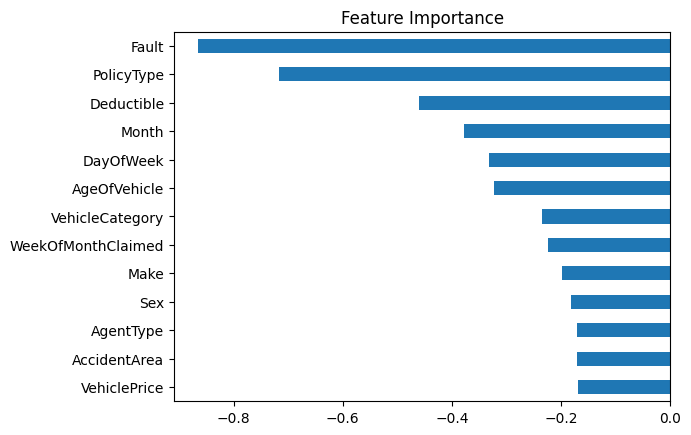

In [ ]:
importance =pipeline["logreg"].coef_[0]
#importance is a list so you can plot it.
feat_importances = pd.Series(importance,X_train_woe[selected_col].columns)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

Finalmente evaluaremos el model con KS el cual nos ayudara a saber si el modelo tiene buen de prediccion a las dos etiquetas

In [ ]:
def calculate_ks_statistic(y_true, y_probs):
    """
    Calcula el estadístico KS entre las distribuciones acumulativas
    de las clases positiva y negativa.

    Args:
        y_true: array con las etiquetas reales (0=bueno, 1=malo)
        y_probs: array con las probabilidades predichas de clase 1 (fraude)

    Returns:
        ks_statistic: valor del estadístico KS (entre 0 y 1)
        ks_table: dataframe con los cálculos intermedios
    """
    # Crear dataframe con los datos
    df = pd.DataFrame({'y_true': y_true, 'y_probs': y_probs})
    df = df.sort_values('y_probs', ascending=False).reset_index(drop=True)

    # Calcular conteos acumulativos
    df['cum_good'] = (df['y_true'] == 0).cumsum()
    df['cum_bad'] = (df['y_true'] == 1).cumsum()

    # Normalizar a proporciones acumulativas
    total_good = (df['y_true'] == 0).sum()
    total_bad = (df['y_true'] == 1).sum()

    df['cum_good_pct'] = df['cum_good'] / total_good
    df['cum_bad_pct'] = df['cum_bad'] / total_bad

    # Calcular KS
    df['ks'] = (df['cum_bad_pct'] - df['cum_good_pct']).abs()

    # Obtener el máximo KS
    ks_statistic = df['ks'].max()
    ks_position = df['ks'].idxmax()

    return ks_statistic, df

In [ ]:
def plot_ks_curve(ks_table, ks_value, ks_position):
    """
    Grafica la curva KS con las distribuciones acumulativas.
    """
    plt.figure(figsize=(10, 6))

    # Graficar curvas acumulativas
    plt.plot(ks_table.index, ks_table['cum_good_pct'], label='Buenos (No Fraude)')
    plt.plot(ks_table.index, ks_table['cum_bad_pct'], label='Malos (Fraude)')

    # Marcar el punto KS
    plt.axvline(x=ks_position, color='r', linestyle='--',
                label=f'KS={ks_value:.3f} (Posición: {ks_position})')

    plt.title(f'Curva KS (Estadístico = {ks_value:.3f})')
    plt.xlabel('Número de Observaciones Ordenadas por Probabilidad')
    plt.ylabel('Proporción Acumulativa')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

Estadístico KS: 0.5368
Porcentaje KS: 53.68%


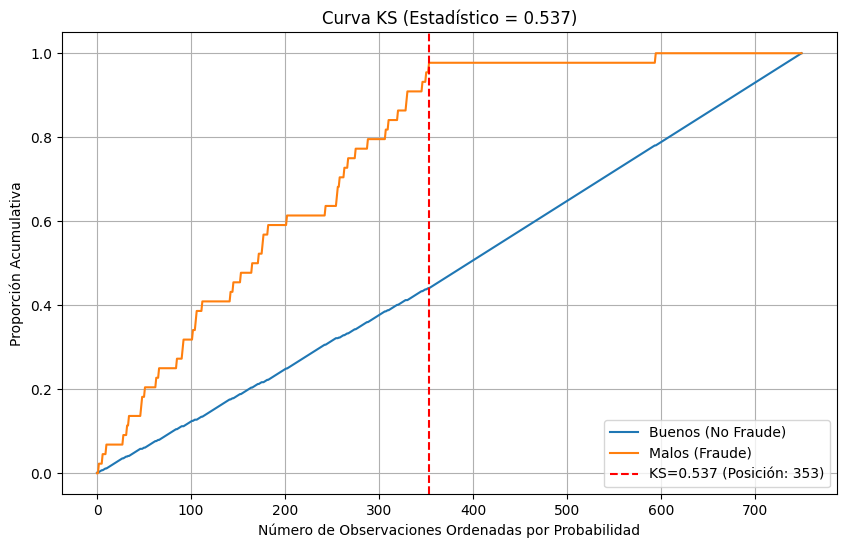

In [ ]:

# Obtener probabilidades predichas
y_probs =pipeline.predict_proba(X_val[selected_col])[:, 1]  # Probabilidades de clase 1 (fraude)

# Calcular KS
ks_value, ks_table = calculate_ks_statistic(y_val, y_probs)

# Mostrar resultados
print(f"Estadístico KS: {ks_value:.4f}")
print(f"Porcentaje KS: {ks_value*100:.2f}%")

# Graficar
plot_ks_curve(ks_table, ks_value, ks_table['ks'].idxmax())

Mediante KS podemos ver que el modelo se comporta bien teniendo un buen poder discriminativo (ideal para modelos de riesgo)

## scorecard

Una vez que tenemos a nuestro modelo elegido, procedemos a generar un scorecard el cual transforma la probabilidad de default/fraude en un puntaje legible para negocio.

Fórmula general:


$$Score = \text{Offset} + \text{Factor} \times \ln(\text{Odds})$$

Donde los componentes se definen como:

Odds:
$$\text{Odds} = \frac{P(\text{Good})}{P(\text{Bad})}$$

Factor:
$$\text{Factor} = \frac{\text{PDO}}{\ln(2)}$$

Offset:
$$\text{Offset} = \text{BaseScore} - \text{Factor} \times \ln(\text{BaseOdds})$$

- Para Odds que es La relación "bueno/malo" para el score base consideraremos la proporcion de nuestro dataset que es 1:15 lo cual es 1 fraude cada 15 no fraudes
- PDO (Points to Double Odds)
Número de puntos que representan duplicar la probabilidad de "buen cliente" vs "malo" (o viceversa).
Ejemplo común: PDO = 50 Si un cliente tiene 50 puntos más, sus odds de no fraude son el doble.
- Score (Score en Odds)
Puntaje asignado a un conjunto de odds de referencia, como referencia se ocupa mayormente 600

In [ ]:
# Función para calcular Score

def prob_to_score(prob, base_point=600, pdo=50, odds=15):
    """
    Convierte una probabilidad en un puntaje de scorecard.
    base_point: Puntaje base (por ejemplo 600)
    pdo: Points to Double Odds (ej. 50 = cada 50 puntos se duplican las probabilidades)
    odds: Odds base en el puntaje base (ej. 15 significa 15:1 buenos/malos)
    """
    # Score formula: score = offset - factor * log(odds)
    factor = pdo / np.log(2)
    offset = base_point - factor * np.log(odds)
    odds_value = (1 - prob) / prob
    score = offset + factor * np.log(odds_value)
    return round(score, 0)


In [ ]:
y_pred_proba = pipeline.predict_proba(X_val[selected_col])[:, 1]
scores = [prob_to_score(p) for p in y_pred_proba]

In [ ]:
result_df = X_val[selected_col].copy()
result_df["fraud_probability"] = y_pred_proba
result_df["scorecard_points"] = scores

Finalmente como resultado tenemos el score y la probabilidad de fraude

In [ ]:
result_df.head()

,Fault,PolicyType,VehicleCategory,Month,VehiclePrice,Make,DayOfWeek,AgeOfVehicle,Deductible,Sex,AccidentArea,AgentType,WeekOfMonthClaimed,fraud_probability,scorecard_points
3170,Third Party,Sedan - All Perils,Sedan,Jan,30000 to 39000,Chevrolet,Wednesday,7 years,400,Female,Urban,External,2,0.133365,540.0
2268,Policy Holder,Sedan - Collision,Sedan,Apr,30000 to 39000,Chevrolet,Friday,6 years,400,Male,Urban,External,4,0.577405,382.0
10,Policy Holder,Sedan - Collision,Sedan,May,30000 to 39000,Mazda,Tuesday,7 years,400,Female,Urban,External,2,0.563314,386.0
2294,Policy Holder,Sedan - Collision,Sedan,Dec,20000 to 29000,Toyota,Sunday,5 years,400,Male,Urban,External,2,0.570511,384.0
4212,Third Party,Sedan - Collision,Sedan,Apr,20000 to 29000,Pontiac,Wednesday,7 years,400,Male,Urban,External,3,0.094152,568.0


El siguiente paso es poder montar este pipeline del modelo y el calculo del scorecard en un API rest para esto, se guardara el modelo en un archivo .pkl y se montara en una API rest usando fast API

In [ ]:
import joblib
joblib.dump(pipeline, "fraud_model_pipeline.pkl")

['fraud_model_pipeline.pkl']

In [ ]:
# probando el modelo
model_test = joblib.load("fraud_model_pipeline.pkl")

In [ ]:
y_pred_proba = model_test.predict_proba(X_val[selected_col])[:, 1]
scores = [prob_to_score(p) for p in y_pred_proba]

In [ ]:
result_df = X_val[selected_col].copy()
result_df["fraud_probability"] = y_pred_proba
result_df["scorecard_points"] = scores
result_df

,Fault,PolicyType,VehicleCategory,Month,VehiclePrice,Make,DayOfWeek,AgeOfVehicle,Deductible,Sex,AccidentArea,AgentType,WeekOfMonthClaimed,fraud_probability,scorecard_points
3170,Third Party,Sedan - All Perils,Sedan,Jan,30000 to 39000,Chevrolet,Wednesday,7 years,400,Female,Urban,External,2,0.133365,540.0
2268,Policy Holder,Sedan - Collision,Sedan,Apr,30000 to 39000,Chevrolet,Friday,6 years,400,Male,Urban,External,4,0.577405,382.0
10,Policy Holder,Sedan - Collision,Sedan,May,30000 to 39000,Mazda,Tuesday,7 years,400,Female,Urban,External,2,0.563314,386.0
2294,Policy Holder,Sedan - Collision,Sedan,Dec,20000 to 29000,Toyota,Sunday,5 years,400,Male,Urban,External,2,0.570511,384.0
4212,Third Party,Sedan - Collision,Sedan,Apr,20000 to 29000,Pontiac,Wednesday,7 years,400,Male,Urban,External,3,0.094152,568.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,Third Party,Sedan - All Perils,Sedan,Sep,20000 to 29000,Toyota,Monday,more than 7,400,Male,Urban,External,1,0.157127,526.0
2892,Policy Holder,Sedan - Collision,Sedan,May,40000 to 59000,Ford,Tuesday,more than 7,400,Male,Urban,External,3,0.654305,359.0
1818,Policy Holder,Sedan - All Perils,Sedan,Oct,less than 20000,Toyota,Friday,6 years,400,Male,Urban,External,2,0.704419,342.0
1954,Third Party,Sedan - All Perils,Sedan,Oct,30000 to 39000,Mazda,Thursday,more than 7,400,Male,Urban,External,2,0.145914,532.0


Para generar el API rest usando fast API se creara el siguiente script llamado main.py.
Algunas cosas a tomar en consideracion son:
- Para que el modelo se pueda recrear es necesario el archivo woe_tranformer.py el cual contiene las funciones de transformacion a woe que se generaron
- La funcion de score de igual forma se tiene que importar o en este caso estara dentro del archivo main.py

In [ ]:
# main.py
from fastapi import FastAPI
import joblib
import pandas as pd
from woe_transformer import WoETransformer

# Función para calcular Score

def prob_to_score(prob, base_point=600, pdo=50, odds=15):
    """
    Convierte una probabilidad en un puntaje de scorecard.
    base_point: Puntaje base (por ejemplo 600)
    pdo: Points to Double Odds (ej. 50 = cada 50 puntos se duplican las probabilidades)
    odds: Odds base en el puntaje base (ej. 15 significa 15:1 buenos/malos)
    """
    # Score formula: score = offset - factor * log(odds)
    factor = pdo / np.log(2)
    offset = base_point - factor * np.log(odds)
    odds_value = (1 - prob) / prob
    score = offset + factor * np.log(odds_value)
    return round(score, 0)


app = FastAPI()

# Cargar modelo
model = joblib.load("fraud_model_pipeline.pkl")


@app.post("/score")
def score(data: dict):
    """
    Recibe un diccionario con las variables del modelo.
    """
    # Convertir a DataFrame (1 fila)
    df = pd.DataFrame([data])

    # Probabilidad de fraude
    prob = model.predict_proba(df)[:, 1][0]

    # Calcular score
    score = prob_to_score(prob)

    return {
        "fraud_probability": round(prob, 4),
        "score": int(score)
    }


Una vez montado el API rest, esta puede consultarse con el siguiente script

In [ ]:
# request.py

import requests

# URL defaul cuando se corre uvicorn localmente

url = "http://127.0.0.1:8000/score"

payload = {
     "Fault" : 'Policy Holder',  # valores posibles 'Policy Holder', 'Third Party'
     "PolicyType" : 'Utility - Collision', #['Sedan - Collision', 'Sport - Liability', 'Sport - Collision', 'Sedan - All Perils', 'Utility - Liability', 'Utility - All Perils', 'Utility - Collision', 'Sport - All Perils'
     "VehicleCategory" : 'Utility', # 'Sedan' 'Sport' ,'Utility',
     "Month" : 'May', # 'Jan', 'Feb', 'Jul', 'Sep', 'Jun', 'Mar', 'May', 'Apr', 'Oct', 'Aug', 'Nov', 'Dec'
     "VehiclePrice": '30000 to 39000', #'20000 to 29000', '30000 to 39000', 'more than 69000', '40000 to 59000','less than 20000' '60000 to 69000'
     "Make": 'Honda', #'Honda' 'Toyota' 'Saab' 'Mazda' 'Pontiac' 'Chevrolet' 'Ford' 'Accura''VW' 'Mercury' 'Dodge' 'Saturn' 'Nisson' 'Jaguar' 'BMW' 'Porche' 'Mecedes'
     "DayOfWeek": 'Monday', #'Tuesday' 'Saturday' 'Monday' 'Friday' 'Wednesday' 'Sunday' 'Thursday'
     "AgeOfVehicle": '6 years', #'more than 7' '6 years' '7 years' '5 years' 'new' '4 years' '3 years' '2 years'
     "Deductible": 400, #400 700 500 300
     "Sex": 'Male', #'Male' 'Female'
     "AccidentArea":'Urban', #'Urban' 'Rural'
     "AgentType": 'External', # External' 'Internal'
     "WeekOfMonthClaimed": 5 # 2 4 1 3 5
}
response = requests.post(url, json=payload)

print(response.json())
